### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Independent variable is Congruent or incongruent condition
Dependent Variable: Time required to complete the test

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

 Null Hypothesis (H0): Assuming there is no time difference in two reading tasks (Congruent & Incongruent) : 
Alternative Hypothesis(H1):Time(incongruent) > Time(congruent)
H0: μi ≤ μc (μi - population mean of incongruent values, μc - population mean of congruent values)

H1: μi > μc (μi - population mean of incongruent values, μc - population mean of congruent values)

#### Two tailed t test :
Need to find out statistically significant difference between two means 
Assumption is the distributions are almost normal and dependent samples
The standard deviations are not given for the population and sample size is small

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [3]:
# load data into current directory
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import t
%matplotlib inline

df =pd.read_csv('./stroopdata.csv')

In [4]:
df.mean(axis=0)


Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [5]:
df.std(axis=0)

Congruent      3.559358
Incongruent    4.797057
dtype: float64

In [6]:
print("standard deviation for congruent {0:.3f}".format(np.std(df['Congruent'].values)))
print("standard deviation for Incongruent {0:.3f}".format(np.std(df['Incongruent'].values)))

standard deviation for congruent 3.484
standard deviation for Incongruent 4.696


--write answer here--

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

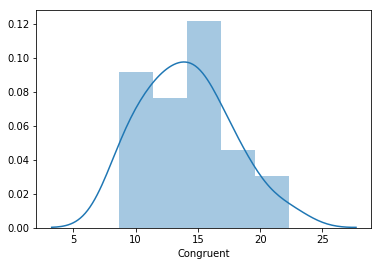

In [7]:

sns.distplot(df['Congruent'])# Build the visualizations here

The data looks almost normally distributed and mid values in the distribution are less than 15 .


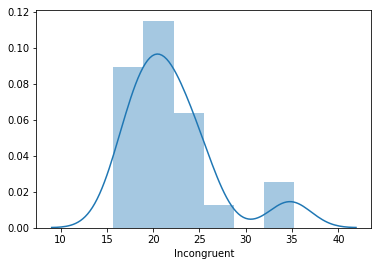

In [8]:
sns.distplot(df['Incongruent'])

Mean looks aligned with the peak of the graph which is an indication of normal distribution
Also the values are present to the upper end of distribution. 

Although both distributions appear kind of right skewed in these histograms , since their peaks align with means we can say they are normally distributed

Lets add some more plots to analyse 
This time im using scatter plots to analyse the data points


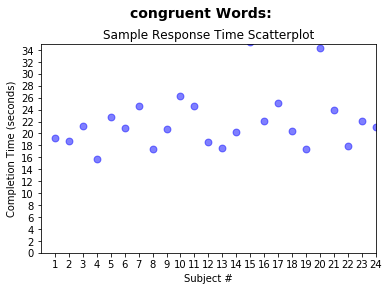

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
N = len(df)
df['Subject'] = df.index+1
df1 = df['Subject']
df2 = df['Incongruent']
colors = 'blue'
area = np.pi * 15 # 0 to 15 point radiuses

fig = plt.figure()
fig.suptitle('congruent Words: ', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Sample Response Time Scatterplot')
ax.set_xlabel('Subject #')
ax.set_ylabel('Completion Time (seconds)')

plt.xticks(np.arange(min(df1), max(df1)+1, 1.0))
plt.yticks(np.arange(0, 35, 2))
plt.scatter(df1, df2, s=area, c=colors, alpha=0.5)
plt.ylim([0,35])
plt.xlim([0,24])
plt.show()

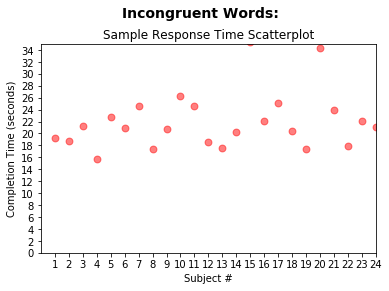

In [10]:
N = len(df)
df1 = df['Subject']
df2= df['Incongruent']
colors = 'red'
area = np.pi * 15 # 0 to 15 point radiuses

fig = plt.figure()
fig.suptitle('Incongruent Words: ', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Sample Response Time Scatterplot')
ax.set_xlabel('Subject #')
ax.set_ylabel('Completion Time (seconds)')

plt.xticks(np.arange(min(df1), max(df1)+1, 1.0))
plt.yticks(np.arange(0, 35, 2))
plt.scatter(df1, df2, s=area, c=colors, alpha=0.5)
plt.ylim([0,35])
plt.xlim([0,24])
plt.show()

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [15]:
# sample data
print (df['Congruent'])


0     12.079
1     16.791
2      9.564
3      8.630
4     14.669
5     12.238
6     14.692
7      8.987
8      9.401
9     14.480
10    22.328
11    15.298
12    15.073
13    16.929
14    18.200
15    12.130
16    18.495
17    10.639
18    11.344
19    12.369
20    12.944
21    14.233
22    19.710
23    16.004
Name: Congruent, dtype: float64


In [16]:
print (df['Incongruent'])

0     19.278
1     18.741
2     21.214
3     15.687
4     22.803
5     20.878
6     24.572
7     17.394
8     20.762
9     26.282
10    24.524
11    18.644
12    17.510
13    20.330
14    35.255
15    22.158
16    25.139
17    20.429
18    17.425
19    34.288
20    23.894
21    17.960
22    22.058
23    21.157
Name: Incongruent, dtype: float64


In [17]:
#t-critical value for a 95% confidence level and 23 d.f.
t.ppf(.95, 23)

1.7138715277470473

Difference of means is 22.02 - 14.05 = 7.97

SD can be calculated as follows

In [18]:
df['Difference'] = df['Congruent'] - df['Incongruent']
print("standard deviation for congruent {0:.4f}".format(df['Difference'].std(axis=0)))

standard deviation for congruent 4.8648


#### T-Statistic

In [19]:
7.97/(4.8648 / math.sqrt(24))

8.025996238275749

Since this value is greater than the critical value we found , we reject the null hypothesis

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Naming the font color of the printed word is easier and quicker if the word meaning and font color are congruent.
Other tasks that are based on stroop effect can be done with numbers. Numerical stroop 


References:
https://imotions.com/blog/the-stroop-effect/
https://en.wikipedia.org/wiki/Stroop_effect